# Project: European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive and has 7 tables namely: 'Country', 'Match', 'Player', Player_Attributes', 'Team', 'Team_Attributes'. it contains useful data about 11 seasons between 2008 to 2016 in differents leagues and a list of Players, Teams and their attributes.

> I investigate more about this dataset on kaggle https://www.kaggle.com/datasets/hugomathien/soccer
### During the analysis of the dataset I want to focus on answering these questions
> <ul>
    <li>How many matches are there in the 2014 season?</li>
    <li>How many goals are there in each League in the 2014 season?</li>
    <li>Team with the fewest lost matches in the 2014 season?</li>
    <li>Players that had the most penalties kick? </li>
    <li>Which team had the most win matches in the 2014 season? </li>
</ul>

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> In this section I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.
### General Properties

In [2]:
# loading and reading csv files data that i will investigate
df_country = pd.read_csv('country.csv')
df_league = pd.read_csv('league.csv')
df_match = pd.read_csv('match.csv')
df_player = pd.read_csv('player.csv')
df_player_attributes = pd.read_csv('player_attributes.csv')
df_team = pd.read_csv('team.csv')
df_team_attributes = pd.read_csv('team_attributes.csv')
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [3]:
df_league.shape

(11, 3)

In [4]:
df_league.describe()

,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [5]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


##### League Table:-
Contain 11 Records and 3 Columns. <br>
No duplicate records <br>
Has no missing values.

In [6]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [7]:
df_country.shape

(11, 2)

In [8]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [9]:
df_country.describe()

,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


##### Country Table:-
Contain 11 Records and 2 Columns. <br>
No duplicate records <br>
Has no missing values.

In [10]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
df_match.shape

(25979, 115)

In [12]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [13]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [14]:
df_match.duplicated().sum()

0

In [15]:
df_match.isnull().sum().sum()

407395

##### Match Table:-
Contain 25979 Records and 115 Columns. <br>
No duplicate records <br>
Has a lot of missing values '407395' but all the null values are in columns I won't need in processes, so I will drop them.

In [16]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [17]:
df_player.shape

(11060, 7)

In [18]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [19]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


##### Player Table:-
Contain 11060 Records and 7 Columns. <br>
No duplicate records <br>
Has no missing values.

In [20]:
df_player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [21]:
df_player_attributes.shape

(183978, 42)

In [22]:
df_player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [23]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [24]:
# Number of duplicated records player attribute table
df_player_attributes.duplicated().sum()

0

In [25]:
# Number of null values in each columns in player attribute table
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [26]:
df_player_attributes.isnull().sum().sum()

47301

##### Player_attributes Table:-
Contain 183973 Records and 42 Columns. <br>
No duplicate records <br>
Has a lot of missing values (47301).

In [27]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [28]:
df_team.shape

(299, 5)

In [29]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [30]:
df_team.duplicated().sum()

0

In [31]:
df_team.isnull().sum().sum()

11

In [32]:
df_team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


##### Team Table:-
Contain 299 Records and 5 Columns. <br>
No duplicate records <br>
Has only 11 missing values.

In [33]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [34]:
df_team_attributes.shape

(1458, 25)

In [35]:
df_team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [36]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [37]:
df_team_attributes.duplicated().sum()

0

In [38]:
df_team_attributes.isnull().sum().sum()

969

In [39]:
df_team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


##### Team_Attributes Table:-
Contain 1458 Records and 25 Columns. <br>
No duplicate records <br>
Has 969 missing values.

### I found that this dataset has
+25,000 matches,
+10,000 players,
11 Countries with their lead championship and
Seasons 2008 - 2016.

<table>
    <tr>
        <th>Table </th>
        <th>Records </th>
        <th>Columns </th>
    </tr>
    <tr>
        <td>League </td>
        <td>11</td>
        <td>3</td> 
    </tr>
    <tr>
        <td>Match</td>
        <td>25979</td>
        <td>115</td>
    </tr>
    <tr>
        <td>Player</td>
        <td>11060</td>
        <td>7</td>
    </tr>
    <tr>
        <td>Player_Attributes</td>
        <td>183978</td>
        <td>42</td>
    </tr>
    <tr>
        <td>Team</td>
        <td>299</td>
        <td>5</td>
    </tr>
    <tr>
        <td>Team_Attributes</td>
        <td>1458</td>
        <td>25</td>
    </tr>
</table>

#### Data Cleaning (Matches Table)

In [40]:
# Selecting columns we need in analysis
df_match = df_match.loc[:,:'away_team_goal']
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [41]:
# Convert date to datetime type to gain availability to dedicate a year of each date
df_match['date'] = pd.to_datetime(df_match['date'])
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [42]:
# Add new column to match table for years
df_match['season_year'] = df_match['date'].dt.year
# Print the maximum and minimum year in season year column
str(df_match['season_year'].min()) + " : " + str(df_match['season_year'].max())

'2008 : 2016'

In [43]:
# rename column 'name' to "country_name"
df_country.rename(columns={'name' : 'country_name'}, inplace=True)

# join df_match with country table by inner join type
df_match = df_match.merge(df_country, how='inner', left_on= 'country_id', right_on= "id")
# drop column id_y
df_match.drop(columns=['id_y'], inplace=True)
# rename column id_x to id
df_match.rename(columns={'id_x' : 'id'}, inplace=True)
# show sample

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium


In [44]:
# we will now join df_match with team table by inner join type for home team
df_match = df_match.merge(df_team, how='inner', left_on= 'home_team_api_id', right_on= "team_api_id")
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9987,9999,1,1,2008,Belgium,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9987,9984,3,2,2008,Belgium,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9987,9986,1,0,2008,Belgium,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9987,9998,2,0,2009,Belgium,1,9987,673.0,KRC Genk,GEN


In [45]:
# rename column 'team_long_name' to 'team_home_name'
df_match.rename(columns={'team_long_name' : 'team_home_name', 'country_name_x' : 'country_name', 'id_x' : 'id'}, inplace=True)

# droping column home_team_api_id, team_api_id, id_y
df_match.drop(columns=['home_team_api_id', 'team_api_id', 'id_y'], axis=1, inplace=True)
# Showing sample
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name,team_fifa_api_id,team_home_name,team_short_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,2008,Belgium,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,2008,Belgium,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,2008,Belgium,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,2008,Belgium,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,2009,Belgium,673.0,KRC Genk,GEN


In [46]:
# join df_match with team table by left join type for away team
df_match = df_match.merge(df_team, how='left', left_on='away_team_api_id', right_on='team_api_id')
# showing sample
df_match.head()

,id_x,country_id,league_id,season,stage,date,match_api_id,away_team_api_id,home_team_goal,away_team_goal,season_year,country_name,team_fifa_api_id_x,team_home_name,team_short_name_x,id_y,team_api_id,team_fifa_api_id_y,team_long_name,team_short_name_y
0,1,1,1,2008/2009,1,2008-08-17,492473,9993,1,1,2008,Belgium,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,29,1,1,2008/2009,12,2008-11-15,492583,9999,1,1,2008,Belgium,673.0,KRC Genk,GEN,13,9999,546.0,KSV Roeselare,ROS
2,47,1,1,2008/2009,14,2008-11-29,492651,9984,3,2,2008,Belgium,673.0,KRC Genk,GEN,5,9984,1750.0,KSV Cercle Brugge,CEB
3,65,1,1,2008/2009,16,2008-12-13,492713,9986,1,0,2008,Belgium,673.0,KRC Genk,GEN,18,9986,670.0,Sporting Charleroi,CHA
4,94,1,1,2008/2009,19,2009-01-24,492805,9998,2,0,2009,Belgium,673.0,KRC Genk,GEN,8,9998,1747.0,RAEC Mons,MON


In [47]:
# rename column: team_long_name to away_team_name, id_x to id and team_short_name_x to team_short_name
df_match.rename(columns={'team_long_name': 'away_team_name', 'team_short_name_x' : 'team_short_name', 'id_x' : 'id'}, inplace=True)
# we observe there are some unnecessary columns so, i will drop them
df_match.drop(columns=['match_api_id', 'away_team_api_id', 'team_fifa_api_id_x', 'id_y', 'team_api_id', 'team_fifa_api_id_y', 'team_short_name_y'], axis=1, inplace=True)

# Showing sample
df_match.head()

,id,country_id,league_id,season,stage,date,home_team_goal,away_team_goal,season_year,country_name,team_home_name,team_short_name,away_team_name
0,1,1,1,2008/2009,1,2008-08-17,1,1,2008,Belgium,KRC Genk,GEN,Beerschot AC
1,29,1,1,2008/2009,12,2008-11-15,1,1,2008,Belgium,KRC Genk,GEN,KSV Roeselare
2,47,1,1,2008/2009,14,2008-11-29,3,2,2008,Belgium,KRC Genk,GEN,KSV Cercle Brugge
3,65,1,1,2008/2009,16,2008-12-13,1,0,2008,Belgium,KRC Genk,GEN,Sporting Charleroi
4,94,1,1,2008/2009,19,2009-01-24,2,0,2009,Belgium,KRC Genk,GEN,RAEC Mons


In [48]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 13 columns):
id                 25979 non-null int64
country_id         25979 non-null int64
league_id          25979 non-null int64
season             25979 non-null object
stage              25979 non-null int64
date               25979 non-null datetime64[ns]
home_team_goal     25979 non-null int64
away_team_goal     25979 non-null int64
season_year        25979 non-null int64
country_name       25979 non-null object
team_home_name     25979 non-null object
team_short_name    25979 non-null object
away_team_name     25979 non-null object
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 2.8+ MB


In [49]:
# Show df_league data
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [50]:
# rename the two columns 'name' and 'id'
df_league.rename(columns={'name' : 'league_name', 'id' : 'league_id'}, inplace=True)

In [51]:
# join df_match with league table by inner join type for away team
df_match = df_match.merge(df_league, how= 'inner', on='league_id')
df_match.head()

,id,country_id_x,league_id,season,stage,date,home_team_goal,away_team_goal,season_year,country_name,team_home_name,team_short_name,away_team_name,country_id_y,league_name
0,1,1,1,2008/2009,1,2008-08-17,1,1,2008,Belgium,KRC Genk,GEN,Beerschot AC,1,Belgium Jupiler League
1,29,1,1,2008/2009,12,2008-11-15,1,1,2008,Belgium,KRC Genk,GEN,KSV Roeselare,1,Belgium Jupiler League
2,47,1,1,2008/2009,14,2008-11-29,3,2,2008,Belgium,KRC Genk,GEN,KSV Cercle Brugge,1,Belgium Jupiler League
3,65,1,1,2008/2009,16,2008-12-13,1,0,2008,Belgium,KRC Genk,GEN,Sporting Charleroi,1,Belgium Jupiler League
4,94,1,1,2008/2009,19,2009-01-24,2,0,2009,Belgium,KRC Genk,GEN,RAEC Mons,1,Belgium Jupiler League


In [52]:
df_match.drop(columns=['country_id_x', 'league_id', 'country_id_y'], inplace=True)
# show sample
df_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 12 columns):
id                 25979 non-null int64
season             25979 non-null object
stage              25979 non-null int64
date               25979 non-null datetime64[ns]
home_team_goal     25979 non-null int64
away_team_goal     25979 non-null int64
season_year        25979 non-null int64
country_name       25979 non-null object
team_home_name     25979 non-null object
team_short_name    25979 non-null object
away_team_name     25979 non-null object
league_name        25979 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 2.6+ MB


### Data Cleaning (Players)
Join df_player with df_player_attributes table to found player name with attributes easily 

In [53]:
df_player = df_player.merge(df_player_attributes, on=['player_api_id', 'player_fifa_api_id'], how = 'inner')
df_player.head()

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id_y,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,2016-02-18 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,2015-11-19 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,2015-09-21 00:00:00,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,2015-03-20 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,2007-02-22 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [54]:
# rename column 'id_x' to 'id'
df_player.rename(columns={'id_x' : 'id'}, inplace=True)

#drop column id_y, player_api_id, player_fifa_api_id
df_player.drop(columns=['id_y', 'player_api_id', 'player_fifa_api_id'], inplace=True)
# Show sample info
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183766 entries, 0 to 183765
Data columns (total 44 columns):
id                     183766 non-null int64
player_name            183766 non-null object
birthday               183766 non-null object
height                 183766 non-null float64
weight                 183766 non-null int64
date                   183766 non-null object
overall_rating         183016 non-null float64
potential              183016 non-null float64
preferred_foot         183016 non-null object
attacking_work_rate    180622 non-null object
defensive_work_rate    183016 non-null object
crossing               183016 non-null float64
finishing              183016 non-null float64
heading_accuracy       183016 non-null float64
short_passing          183016 non-null float64
volleys                181139 non-null float64
dribbling              183016 non-null float64
curve                  181139 non-null float64
free_kick_accuracy     183016 non-null float64
long_p

In [55]:
# checking null values
df_player.isnull().sum()

id                        0
player_name               0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          750
potential               750
preferred_foot          750
attacking_work_rate    3144
defensive_work_rate     750
crossing                750
finishing               750
heading_accuracy        750
short_passing           750
volleys                2627
dribbling               750
curve                  2627
free_kick_accuracy      750
long_passing            750
ball_control            750
acceleration            750
sprint_speed            750
agility                2627
reactions               750
balance                2627
shot_power              750
jumping                2627
stamina                 750
strength                750
long_shots              750
aggression              750
interceptions           750
positioning             750
vision                 2627
penalties           

In [56]:
# drop records that have missing value
df_player.dropna(inplace=True)

In [57]:
# checking if there is still null values
df_player.isnull().sum()

id                     0
player_name            0
birthday               0
height                 0
weight                 0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0


### Data Cleaning (Team Table)
Drop a buildUpPlayerDribbling column which has the most missed values in the team_attributes table

In [58]:
# Show sample
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [59]:
df_team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [60]:
# Drop column with the most missed values
df_team_attributes.drop(columns=['buildUpPlayDribbling'], axis=1, inplace=True)
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositio

In [61]:
# join df_team with df_team_attributes tables to easily merge name of name beside their attributes
df_team = df_team.merge(df_team_attributes, on =['team_api_id', 'team_fifa_api_id'], how='inner')
# Show Sample
df_team.head()

,id_x,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485,2010-02-22 00:00:00,45,Balanced,Little,...,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486,2011-02-22 00:00:00,66,Balanced,Little,...,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487,2012-02-22 00:00:00,53,Balanced,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488,2013-09-20 00:00:00,58,Balanced,Little,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489,2014-09-19 00:00:00,58,Balanced,Normal,...,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [62]:
# drop column id_y, team_api_id, team_fifa_api_id, team_short_name
df_team.drop(columns=['id_y', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], inplace=True)
# rename id_x
df_team.rename(columns={'id_x' : 'id'}, inplace=True)
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 23 columns):
id                                1458 non-null int64
team_long_name                    1458 non-null object
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootingClass       1458 non-null object
chanceCreationPositioningClass    1458 non-null object
defencePressure    

In [63]:
# convert date to datetime type and add new column to team table to store years
df_team['date'] = pd.to_datetime(df_team['date'])
df_team['year'] = df_team['date'].dt.year

In [64]:
# drop records that have missing value
df_team.dropna(inplace=True)


In [65]:
# Check duplicate values
df_team.duplicated().sum()

1

In [66]:
# Drop duplicate values
df_team.drop_duplicates(inplace=True)
df_team.describe()

,id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,22708.422787,52.463967,48.489362,52.166781,53.734386,53.971860,46.017845,49.253946,52.187371,2012.505148
std,15008.544877,11.549653,10.899771,10.364195,11.090171,10.330588,10.230702,9.740734,9.577828,1.708538
min,1.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000
25%,9548.000000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000
50%,20525.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000
75%,35294.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000
max,50204.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000


In [67]:
# Re-check missed values before start analysis
df_team.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How many matches are there in the 2014 season?)

Now we will discover how many matches are there in the 2016 season? To know most result that come from leagues that have more matches for Winner of Goals that make sense

In [68]:
df_match.head()

,id,season,stage,date,home_team_goal,away_team_goal,season_year,country_name,team_home_name,team_short_name,away_team_name,league_name
0,1,2008/2009,1,2008-08-17,1,1,2008,Belgium,KRC Genk,GEN,Beerschot AC,Belgium Jupiler League
1,29,2008/2009,12,2008-11-15,1,1,2008,Belgium,KRC Genk,GEN,KSV Roeselare,Belgium Jupiler League
2,47,2008/2009,14,2008-11-29,3,2,2008,Belgium,KRC Genk,GEN,KSV Cercle Brugge,Belgium Jupiler League
3,65,2008/2009,16,2008-12-13,1,0,2008,Belgium,KRC Genk,GEN,Sporting Charleroi,Belgium Jupiler League
4,94,2008/2009,19,2009-01-24,2,0,2009,Belgium,KRC Genk,GEN,RAEC Mons,Belgium Jupiler League


In [69]:
df_match.describe().round(2)

,id,stage,home_team_goal,away_team_goal,season_year
count,25979.00,25979.00,25979.00,25979.00,25979.00
mean,12990.00,18.24,1.54,1.16,2012.00
std,7499.64,10.41,1.30,1.14,2.35
min,1.00,1.00,0.00,0.00,2008.00
25%,6495.50,9.00,1.00,0.00,2010.00
50%,12990.00,18.00,1.00,1.00,2012.00
75%,19484.50,27.00,2.00,2.00,2014.00
max,25979.00,38.00,10.00,9.00,2016.00


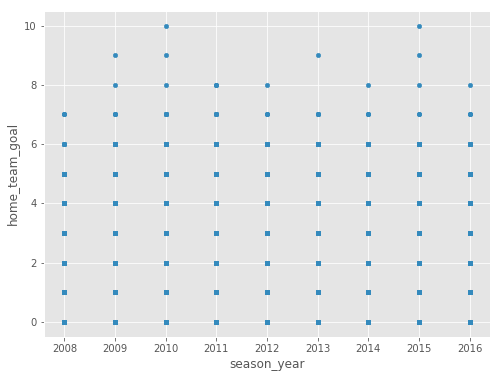

In [70]:
plt.style.use('ggplot')
df_match.plot(kind = 'scatter', x = 'season_year', y = 'home_team_goal', figsize=(8,6))
plt.xlabel('season_year')
plt.ylabel('home_team_goal')
plt.show()

In [71]:
# Create new function which return name of winner team from every match
def winn(df_match):
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    team_home_name = df_match[2] #team_home_name
    team_away_name = df_match[3] #team_away_name
    
    if home_score > away_score:
        return team_home_name
    elif home_score < away_score:
        return team_away_name
    else:
        return 'DRAW'

# add new column which store winners team within winn function
df_match['winner'] = df_match[['home_team_goal', 'away_team_goal', 'team_home_name', 'away_team_name']].apply(winn, axis=1)


In [72]:
# Fetch matches that were only played in the 2013/2014 season
match_2014 = df_match[df_match['season'] == '2013/2014']

In [73]:
# Counting matches played in each league in the 2013/2014 season
match_played = match_2014.groupby('league_name')['team_home_name'].count().sort_values()
match_played

league_name
Belgium Jupiler League       12
Switzerland Super League    180
Scotland Premier League     228
Poland Ekstraklasa          240
Portugal Liga ZON Sagres    240
Germany 1. Bundesliga       306
Netherlands Eredivisie      306
England Premier League      380
France Ligue 1              380
Italy Serie A               380
Spain LIGA BBVA             380
Name: team_home_name, dtype: int64

In [74]:
df_match.home_team_goal.mean()

1.5445937103044767

Plotting the number of matches played in each league

Text(0, 0.5, 'Leagues')

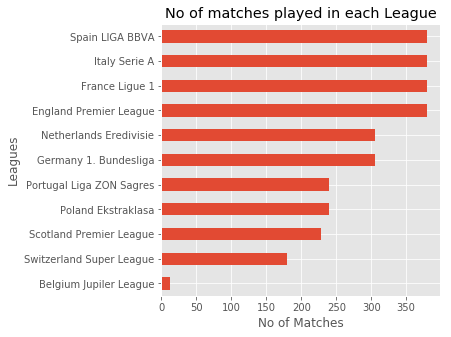

In [75]:
# Figuring the result
match_played.plot(title='No of matches played in each League', kind ='barh', figsize=(5,5));
plt.xlabel('No of Matches')
plt.ylabel('Leagues')

This chart shows that Spain La LIGA BBVN, ITALY Serie A, France ligue 1, and English Premier League had the highest matches of 380 played in the 2013/2014 season 

### Research Question 2  (How many goals are there in each League in the 2014 season?) 

In this question, we will investigate the league's most attacking tendency

In [76]:
goals_2014 = match_2014.groupby('league_name')['home_team_goal'].sum().sort_values(ascending = False) + match_2014.groupby('league_name')['away_team_goal'].sum().sort_values(ascending = False)
goals_2014.sort_values(ascending = True, inplace = True)
goals_2014

league_name
Belgium Jupiler League        30
Switzerland Super League     520
Portugal Liga ZON Sagres     569
Scotland Premier League      626
Poland Ekstraklasa           634
France Ligue 1               933
Germany 1. Bundesliga        967
Netherlands Eredivisie       978
Italy Serie A               1035
Spain LIGA BBVA             1045
England Premier League      1052
dtype: int64

Text(0, 0.5, 'Leagues')

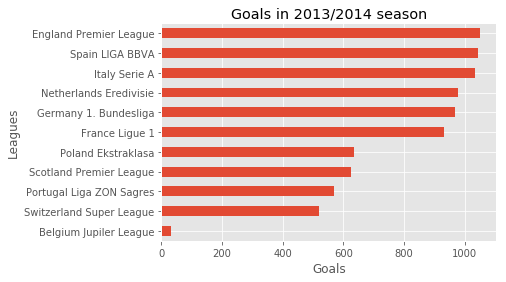

In [77]:
# Figure the result
goals_2014.plot(title='Goals in 2013/2014 season', kind='barh')
plt.xlabel('Goals')
plt.ylabel('Leagues')

The chart above shows that English Premier League had the most highest goals scored in 2013/2014 season

### Research Question 3  (Team with the fewest lost matches in the 2014 season?) 

This question gives us the impression that these teans has great defense and Goalkeeper

In [78]:
# creating function
def lose(df_match):
    home_score = df_match[0] #home_team_goal
    away_score = df_match[1] #away_team_goal
    team_home_name = df_match[2] #team_home_name
    team_away_name = df_match[3] #team_away_name
    
    if home_score < away_score:
        return team_home_name
    elif home_score > away_score:
        return team_away_name
    else:
        return 'DRAW'

# add new column which store loser teams within lose function
df_match['loser'] = df_match[['home_team_goal', 'away_team_goal', 'team_home_name', 'away_team_name']].apply(lose, axis=1)


Text(0.5, 0, 'Number of Match')

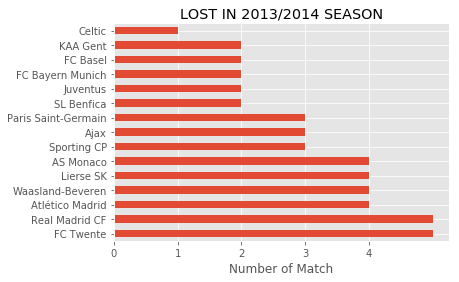

In [79]:
# figure the result
match_2014 = df_match[df_match['season'] == '2013/2014']

match_2014.loser.value_counts().tail(15).plot(kind='barh', title='LOST IN 2013/2014 SEASON', xticks = [0, 1, 2, 3, 4])
plt.xlabel('Number of Match')

Celtic had the fewest lost matches in the 2013/2014 season with 1 match lost

### Research Question 4  (Players that had the most penalties?) 

This data contains the order of penalty for each player, so we will take the last date, which contains the largest glands of penalty kicks.

In [80]:
df_player.head()

,id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right,medium,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right,medium,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [81]:
df_player.describe().round(2)

,id,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,...,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00,180228.00
mean,5520.34,181.88,168.77,68.63,73.48,55.14,49.95,57.27,62.48,49.48,...,57.86,54.93,46.77,50.37,48.04,14.69,15.95,20.53,16.01,16.32
std,3189.86,6.40,15.10,7.03,6.58,17.24,19.04,16.48,14.17,18.25,...,15.15,15.55,21.23,21.49,21.59,16.84,15.84,21.14,16.07,17.18
min,1.00,157.48,117.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,2759.00,177.80,159.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,5532.00,182.88,168.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,8252.00,185.42,179.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00
max,11075.00,208.28,243.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,97.00,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00


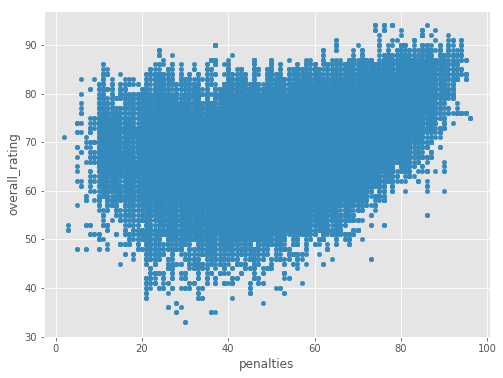

In [82]:
# figuring a scatter plot
df_player.plot(kind = 'scatter', x = 'penalties', y = 'overall_rating', figsize=(8,6))
plt.xlabel('penalties')
plt.ylabel('overall_rating')
plt.show()

In [83]:
# selecting top players and their penalties in descending order 
most_penalties = df_player.groupby(['player_name'])['penalties'].max().sort_values(ascending=False)
most_penalties[:12]

player_name
Rickie Lambert     96.0
Mario Balotelli    95.0
Xavi Hernandez     95.0
Andrea Pirlo       95.0
Paul Scholes       95.0
David Trezeguet    94.0
Cesc Fabregas      94.0
Adrian Mutu        94.0
Iker Casillas      94.0
Hernan Crespo      93.0
Fernando Torres    93.0
Alexander Frei     93.0
Name: penalties, dtype: float64

plotting a to see the top players with the highest penalties in 2013/2014 season

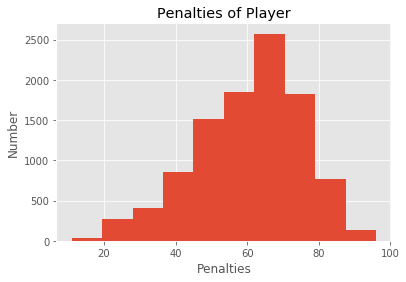

In [84]:
most_penalties.plot(kind='hist', title='Penalties of Player');
plt.xlabel('Penalties');
plt.ylabel('Number');

It shows that Rickie Lambert had the highest penalties in the 2013/2014 season.

### Research Question 5  (Which teams had the most wins of matches in the 2014 season?) 

Now we will discover top teams and the most win which had a wonderful season and gives us an impression that these teams has well organize attacks

In [85]:
match_2014.head()

,id,season,stage,date,home_team_goal,away_team_goal,season_year,country_name,team_home_name,team_short_name,away_team_name,league_name,winner,loser
379,1238,2013/2014,1,2014-03-29,0,1,2014,Belgium,KAA Gent,GEN,KV Oostende,Belgium Jupiler League,KV Oostende,KAA Gent
380,1241,2013/2014,3,2014-04-12,2,1,2014,Belgium,KAA Gent,GEN,Waasland-Beveren,Belgium Jupiler League,KAA Gent,Waasland-Beveren
381,1248,2013/2014,6,2014-05-03,4,0,2014,Belgium,KAA Gent,GEN,Lierse SK,Belgium Jupiler League,KAA Gent,Lierse SK
1539,1239,2013/2014,2,2014-04-05,1,0,2014,Belgium,Lierse SK,LIE,KAA Gent,Belgium Jupiler League,Lierse SK,KAA Gent
1540,1244,2013/2014,4,2014-04-19,0,2,2014,Belgium,Lierse SK,LIE,KV Oostende,Belgium Jupiler League,KV Oostende,Lierse SK


In [86]:
match_2014.describe().round(2)

,id,stage,home_team_goal,away_team_goal,season_year
count,3032.00,3032.00,3032.00,3032.00,3032.0
mean,14254.45,18.34,1.58,1.19,2013.5
std,6946.53,10.49,1.30,1.15,0.5
min,1237.00,1.00,0.00,0.00,2013.0
25%,7034.75,9.00,1.00,0.00,2013.0
50%,14861.50,18.00,1.00,1.00,2014.0
75%,20863.25,27.00,2.00,2.00,2014.0
max,25619.00,38.00,7.00,7.00,2014.0


In [87]:
wins_14 = match_2014.winner.value_counts().head(12).iloc[1:]
wins_14

Juventus               33
Celtic                 31
FC Bayern Munich       29
Atlético Madrid        28
Manchester City        27
Paris Saint-Germain    27
FC Barcelona           27
Real Madrid CF         27
Roma                   26
Liverpool              26
Chelsea                25
Name: winner, dtype: int64

Now, we will plot a chart to view the team with the highest win matches in 2013/2014 season

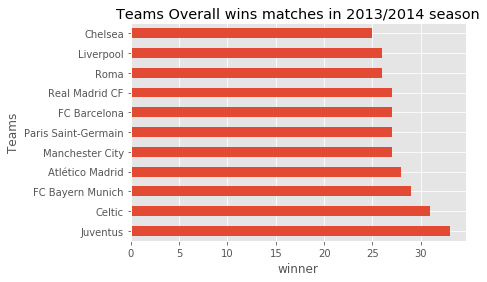

In [88]:
# Figure of the result
wins_14.plot(kind= 'barh', title= 'Teams Overall wins matches in 2013/2014 season');
plt.xlabel('winner');
plt.ylabel('Teams');

The chart above shows that in the 2013/2014 season, Juventus had the highest win matches of 33, followed by Celtic with 31 wins. 

<a id='conclusions'></a>
## Conclusions

> I discovered that each league has a different number of teams because each season does not have the same amount of matches. The Premier League of England and the National Football League of France Ligue 1 and Italy are two of the most popular football leagues in the world. Spain and Serie A The most games are in the LIGA BBVA: There are 380 matches in all.

> England Premier League (1052 goals) had the most goals scored in the 2013/2014 season, followed by Spain LIGA BBVA (1045 goals).

> Celtic, with only one loss in the 2013/2014 season, was the team with the fewest losses.

> Rickie Lambert, Mario Balotelli, Xavi Hernandez, Andrea Pirlo, Paul Scholes are the most penalty scorers in the 2013/2014 season.

>The team that had the most won matches in 2013/14 is Juventus which won 33 games.

### Limitations
> I noticed that the table's information is missing several matching tables (missed values). <br>

> It has been noted that some player's tables are missing from the table metadata (missed values). <br>

> Because the names of the players are duplicated and incomplete, some of the results are inaccurate, so I seek for the entire names to disable matching results. <br>

> I discovered a significant missing value in the "buildUpPlayDribbling" column of the Player Attributes table. I'll lose more players if I decrease rows, so I'll delete the column till I fill up the missing information. <br>

> All of the dates in the dataset are strings, I transformed them to DateTime. <br>

> Missed values and duplicate records are the most common challenges.